In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
large = screen_funds('Equities', 'Domestic', 'Large-Cap')
mid = screen_funds('Equities', 'Domestic', 'Mid-Cap')
small = screen_funds('Equities', 'Domestic', 'Small-Cap')
print(len(large), len(mid), len(small))
quote = Quote(large + mid + small, 60, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

80 20 21
from 2019-05-13 to 2019-07-12 - 121


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats.sort_values('mean', ascending=False).head(20)

117


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
MTUM,38,1.046298,1.867926,0.538894,9.955193,2.638699
PDP,38,1.036859,2.088477,0.477466,10.538408,3.212556
USMV,38,0.910546,1.502395,0.579650,8.481679,1.936934
JKE,38,0.892993,2.052635,0.415715,9.445086,5.543676
IWP,38,0.856595,2.057359,0.397069,9.280934,4.264995
FPX,38,0.846582,2.168475,0.372105,9.012044,4.839755
SCHG,38,0.820505,2.010773,0.388319,8.971042,5.408728
VIG,38,0.808015,1.727441,0.444781,8.178815,3.083112
IWY,38,0.807861,2.144281,0.358245,8.785481,5.937531


/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/optimize.py:1960: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


evicted FV 0.890 0.779
evicted USA 0.742 0.742
retry backlogs ['RVT', 'PRFZ', 'SCHV', 'SCHD', 'FEX', 'FVD', 'VYM', 'NOBL', 'VTWO', 'FNDA', 'GSLC', 'RSP', 'SPY', 'MDYG', 'ONEQ', 'HDV', 'IWB', 'VOO', 'VOE', 'JHMM', 'VXF', 'IWR', 'VTV', 'IWS', 'FTA', 'SCHA', 'SLY', 'IWD', 'DSI', 'VV', 'EZM', 'SUSA', 'SCHB', 'VBR', 'VONV', 'VO', 'JKE', 'DGRO', 'SCHM', 'SPYD', 'SPLG', 'IVV', 'SPTM', 'IYY', 'IUSV', 'VIOO', 'SDY', 'IUSG', 'SPMD', 'PRF', 'MGV', 'IVE', 'MGC', 'SCHX', 'DLN', 'SCHG', 'IJH', 'VBK', 'SPLV', 'IJJ', 'IWV', 'QDF', 'SPYG', 'VTI', 'MGK', 'SLYG', 'PKW', 'DGRW', 'OEF', 'MDY', 'IWM', 'FTCS', 'IWP', 'PDP', 'SPYV', 'ITOT', 'VUG', 'IWF', 'VONG', 'RPG', 'IWY', 'IJT', 'SPSM', 'VB', 'IVW', 'VOOG', 'VIG', 'MDYV', 'SPHD', 'VONE', 'SDOG', 'QUAL', 'DVY', 'FPX', 'LRGF', 'VOT', 'XMLV', 'DON', 'IJK', 'SPHQ', 'IJR', 'FNDX', 'MOAT', 'MTUM', 'FDL', 'TILT', 'PWV', 'RDIV', 'DIA', 'XSLV', 'IWO', 'ADX', 'QQQ', 'VLUE'] at 0.905/-0.51 - 0.58
evicted IWO 0.850 0.685
evicted VLUE 0.870 0.685
evicted ADX 0.797 0.7

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
USMV,38.0,0.910546,1.502395,-1.715238,0.226384,1.032913,1.709588,4.297077,0.57965,8.481679,1.936934
Portfolio,38.0,0.910546,1.502395,-1.715238,0.226384,1.032913,1.709588,4.297077,0.57965,8.481679,1.936934


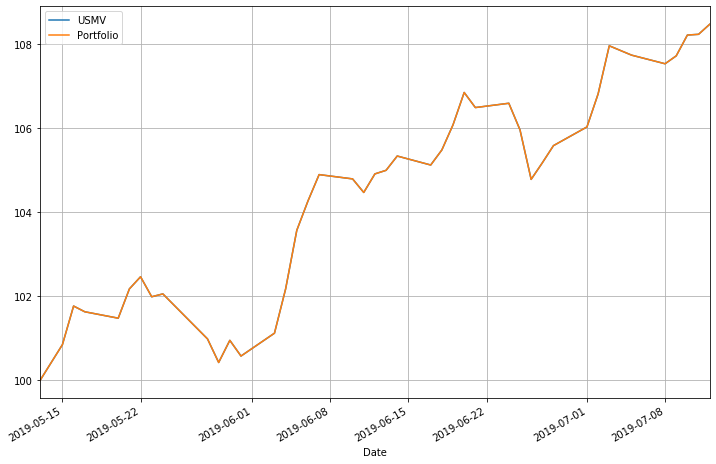

In [4]:
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(_lambda=2)
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio(_lambda=2))
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)